# Topic: Customer Clustering with RFM 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

Data understanding

In [2]:
products = pd.read_csv('Data/Products_with_Categories.csv')
transactions = pd.read_csv('Data/Transactions.csv')

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [4]:
products.head(5)

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [6]:
transactions.head(5)

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


Data Pre-processing

In [7]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [8]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [9]:
products.isnull().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [10]:
transactions.isna().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [11]:
products.isna().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [12]:
df = transactions.merge(products, on='productId', how='left')

In [13]:
df.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [14]:
df['total_sales'] = df['items'] * df['price']

In [15]:
df['transaction_id'] = range(1,len(df)+1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Member_number   38765 non-null  int64         
 1   Date            38765 non-null  datetime64[ns]
 2   productId       38765 non-null  int64         
 3   items           38765 non-null  int64         
 4   productName     38765 non-null  object        
 5   price           38765 non-null  float64       
 6   Category        38765 non-null  object        
 7   total_sales     38765 non-null  float64       
 8   transaction_id  38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [17]:
print('{:,} unique member_number'.format(transactions['Member_number'].nunique()))
print('Transactions timeframe from {} to {}'.format(transactions['Date'].min(), transactions['Date'].max()))

3,898 unique member_number
Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [18]:
df.where(df['price']<0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [19]:
df.where(df['items']<=0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

RFM

In [20]:
max_date = df['Date'].max().date()

Recency = Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x: sum(x)

df_RFM = df.groupby('Member_number').agg({'Date':Recency,
                                          'transaction_id': Frequency,
                                          'total_sales':Monetary})


In [21]:
df_RFM.head()

,Date,transaction_id,total_sales
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [22]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

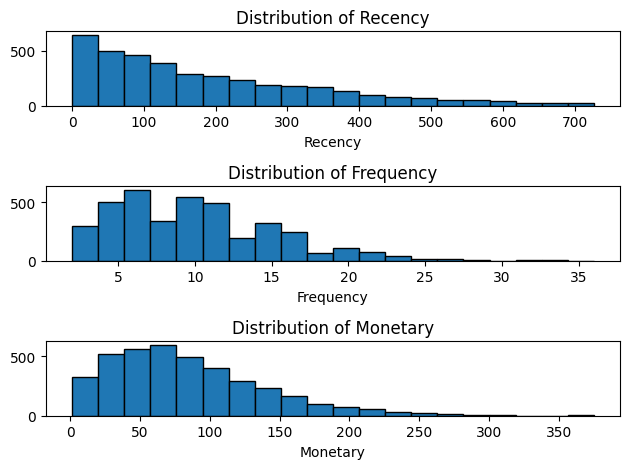

In [23]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều right skew và không phải normal distribution --> Log transfomation để giảm skewness

In [24]:
df_log_transformed = df_RFM.apply(lambda x: np.log1p(x) if x.name in ['Recency', 'Frequency', 'Monetary'] else x)

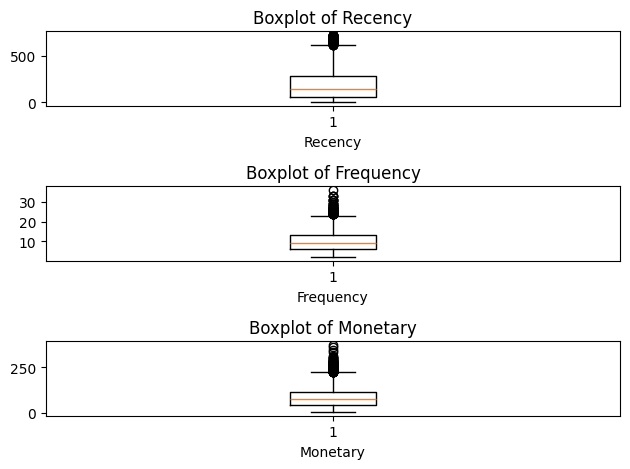

In [25]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_RFM['Recency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_RFM['Frequency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_RFM['Monetary']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều có nhiều upper outliers --> Robust Scaler để giảm ảnh hưởng của outliers

In [26]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_scaled = pd.DataFrame(robust.fit_transform(df_log_transformed[['Recency', 'Frequency', 'Monetary']]), 
                         columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], 
                         index=df_RFM.index)

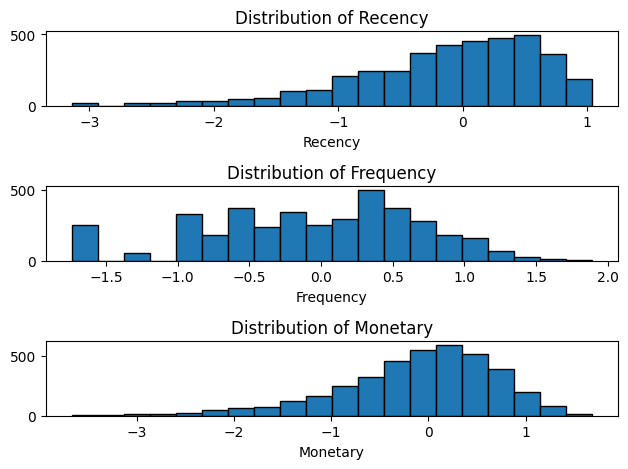

In [27]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_scaled['Recency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_scaled['Frequency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_scaled['Monetary_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

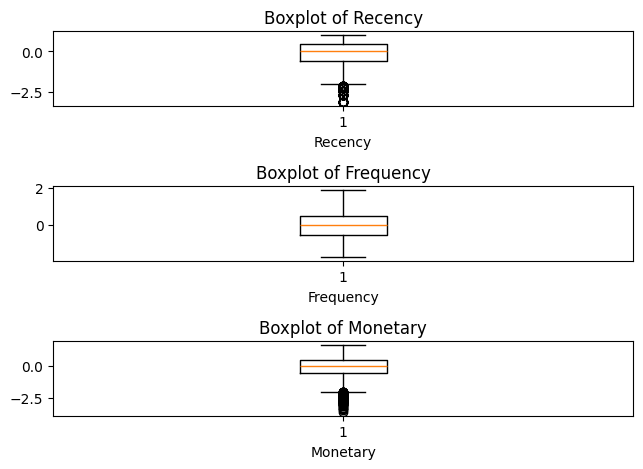

In [28]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_scaled['Recency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_scaled['Frequency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_scaled['Monetary_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Calculate RFM quartiles

In [29]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [30]:
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [31]:
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
1000,35,13,53.80,4,3,2
1001,242,12,100.00,2,3,3
1002,122,8,70.30,3,2,2
1003,323,8,60.65,1,2,2
1004,28,21,204.96,4,4,4


Concat RFM quartile values to create RFM Segments

In [32]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [33]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Member_number,,,,,,,
1000,35,13,53.80,4,3,2,432
1001,242,12,100.00,2,3,3,233
1002,122,8,70.30,3,2,2,322
1003,323,8,60.65,1,2,2,122
1004,28,21,204.96,4,4,4,444


In [34]:
df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique().count()

57

Manual Segmentation

In [35]:
def assign_segment(df):
    # 1. Khách hàng VIP (giá trị nhất)
    if df['R'] in [3, 4] and df['F'] in [3, 4] and df['M'] in [3, 4]:
        return 'VIP Customers'
    
    # 2. Khách hàng trung thành
    elif df['R'] in [2, 3] and df['F'] in [3, 4] and df['M'] in [2, 3]:
        return 'Loyal Customers'
    
    # 3. Khách hàng mới
    elif df['R'] == 4 and df['F'] == 1 and df['M'] in [1, 2]:
        return 'New Customers'
    
    # 4. Khách hàng có nguy cơ rời bỏ
    elif df['R'] in [1, 2] and df['F'] in [1, 2] and df['M'] in [2, 3]:
        return 'At Risk Customers'
    
    # 5. Khách hàng đã rời bỏ
    elif df['R'] == 1 and df['F'] in [1, 2] and df['M'] in [1, 2]:
        return 'Churned Customers'
    
    # 6. Nhóm còn lại: Khách hàng bình thường
    else:
        return 'Regular Customers'

# Áp dụng vào DataFrame
df_RFM['Customer_Segment'] = df_RFM.apply(assign_segment, axis=1)


In [36]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Customer_Segment
Member_number,,,,,,,,
1000,35,13,53.80,4,3,2,432,Regular Customers
1001,242,12,100.00,2,3,3,233,Loyal Customers
1002,122,8,70.30,3,2,2,322,Regular Customers
1003,323,8,60.65,1,2,2,122,At Risk Customers
1004,28,21,204.96,4,4,4,444,VIP Customers


Number of segments

In [37]:
df_RFM['Customer_Segment'].value_counts()

Regular Customers    1352
VIP Customers        1071
At Risk Customers     563
Churned Customers     453
Loyal Customers       369
New Customers          90
Name: Customer_Segment, dtype: int64

Calculate mean values for each segment

In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [39]:
rfm_agg

,Customer_Segment,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,At Risk Customers,313.0,7.0,67.0,563,14.44
1,Churned Customers,460.0,4.0,23.0,453,11.62
2,Loyal Customers,177.0,12.0,77.0,369,9.47
3,New Customers,25.0,4.0,31.0,90,2.31
4,Regular Customers,160.0,9.0,77.0,1352,34.68
5,VIP Customers,60.0,15.0,139.0,1071,27.48


Tree map

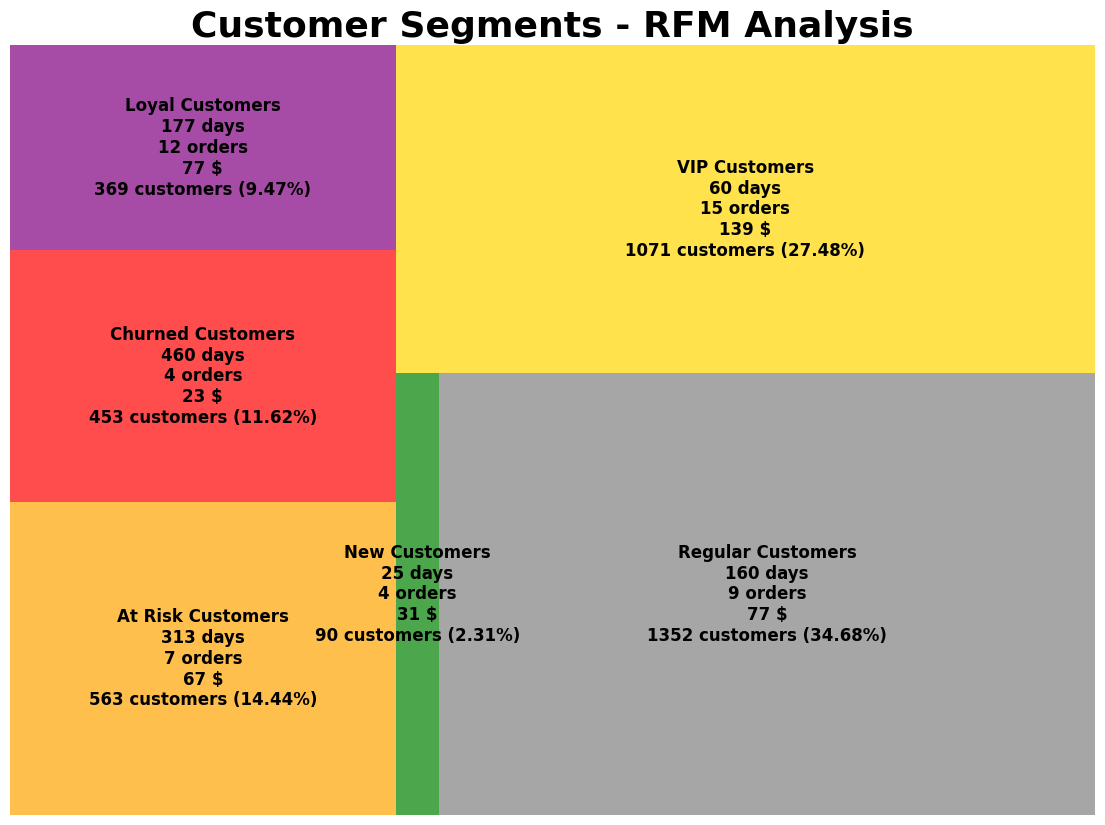

In [40]:
import matplotlib.pyplot as plt
import squarify

# Tạo figure và chỉnh kích thước
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# Dictionary màu sắc mới chỉ với 6 phân khúc khách hàng
colors_dict = {
    'VIP Customers': 'gold',
    'Loyal Customers': 'purple',
    'New Customers': 'green',
    'At Risk Customers': 'orange',
    'Churned Customers': 'red',
    'Regular Customers': 'gray'
}

# Vẽ TreeMap với 6 nhóm khách hàng
squarify.plot(
    sizes=rfm_agg['Count'],
    text_kwargs={'fontsize': 12, 'weight': 'bold', 'fontname': "sans-serif"},
    color=[colors_dict[label] for label in rfm_agg['Customer_Segment']],
    label=[
        f"{rfm_agg['Customer_Segment'][i]}\n"
        f"{rfm_agg['RecencyMean'][i]:.0f} days\n"
        f"{rfm_agg['FrequencyMean'][i]:.0f} orders\n"
        f"{rfm_agg['MonetaryMean'][i]:.0f} $\n"
        f"{rfm_agg['Count'][i]:.0f} customers ({rfm_agg['Percent'][i]}%)"
        for i in range(len(rfm_agg['Customer_Segment']))
    ],
    alpha=0.7
)

# Tùy chỉnh hiển thị
plt.title("Customer Segments - RFM Analysis", fontsize=26, fontweight="bold")
plt.axis('off')

# Lưu hình ảnh
plt.savefig('RFM_Segments.png', dpi=300)
plt.show()


Dữ liệu được chia thành 6 nhóm khách hàng dựa trên mô hình RFM (Recency - Frequency - Monetary).

Khách hàng thường xuyên (Regular Customers) - 63.7%: Đây là nhóm lớn nhất, duy trì mức độ mua sắm ổn định nhưng không quá nổi bật. Cần các chương trình duy trì tần suất mua hàng như tích điểm hoặc khuyến mãi nhẹ.

Khách hàng VIP - 13.49%: Nhóm có giá trị cao nhất với tần suất mua lớn và đơn hàng có giá trị cao. Cần ưu đãi đặc biệt và dịch vụ cá nhân hóa.

Khách hàng trung thành (Loyal Customers) - 9.98%: Quay lại mua hàng thường xuyên, có thể nâng cấp thành khách VIP nếu tiếp tục gia tăng giá trị đơn hàng. Nên khuyến khích bằng chương trình thành viên.

Khách hàng có rủi ro rời đi (At Risk Customers) - 9.36%: Từng mua hàng đều đặn nhưng có dấu hiệu giảm tương tác. Cần kích hoạt lại bằng email nhắc nhở hoặc ưu đãi đặc biệt.

Khách hàng mới (New Customers) - 2.31%: Nhóm mới mua hàng lần đầu, cần có chương trình chào mừng và chăm sóc để giữ chân.

Khách hàng đã rời đi (Churned Customers) - 1.15%: Đã gần như rời bỏ. Cần chiến dịch khuyến mãi hấp dẫn để thu hút quay lại hoặc loại khỏi danh sách marketing để tối ưu chi phí.

In [42]:
import plotly.express as px

fig = px.scatter(rfm_agg, 
                 x='RecencyMean', 
                 y='MonetaryMean', 
                 size='FrequencyMean', 
                 color='Customer_Segment',  # Dữ liệu phân loại
                 hover_data=['RecencyMean', 'MonetaryMean', 'FrequencyMean'], 
                 size_max=50, 
                 color_discrete_sequence=px.colors.qualitative.Set1)  # Dùng bảng màu phù hợp

fig.update_layout(title="RFM Segments Distribution",
                  xaxis_title="Recency (days)",
                  yaxis_title="Monetary (money)",
                  legend_title="Customer Segment")

fig.show()


• Khách hàng VIP (màu vàng) có giá trị chi tiêu cao nhất (~140-160) và có thời gian quay lại gần đây (~50-60 ngày), cho thấy họ là khách hàng quan trọng và vẫn duy trì tương tác tốt. 

• Khách hàng trung thành (màu xanh lá cây) có chi tiêu khá cao (~80-90) với mức độ quay lại trung bình (~150 ngày), thể hiện sự gắn bó nhất định với thương hiệu. 

• Khách hàng thường xuyên (màu cam nhạt) có chi tiêu trung bình (~80) và thời gian quay lại khá dài (~200 ngày), cho thấy họ có thói quen mua hàng nhưng chưa đạt mức trung thành cao. 

• Khách hàng mới (màu tím) có thời gian mua gần đây (~20-30 ngày) nhưng giá trị chi tiêu thấp (~30-40), cần chiến lược thúc đẩy họ tiếp tục mua hàng để nâng cao giá trị lâu dài. 

• Khách hàng có nguy cơ rời bỏ (màu đỏ) từng có mức chi tiêu khá tốt (~70-80) nhưng đã lâu không quay lại (~300 ngày), cần các chương trình tái kích hoạt để thu hút họ trở lại. 

• Khách hàng đã rời bỏ (màu xanh dương đậm) có thời gian không quay lại rất dài (~400 ngày) và chi tiêu thấp (~30-40), có thể khó thu hút nếu không có ưu đãi mạnh. 
